<a href="https://colab.research.google.com/github/MikeSirya/Master-Thesis/blob/main/LSTM_Hold_Out_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np

import  tensorflow.keras.losses

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Castellon Baynat21.csv"

df = pd.read_csv(csv_path)
df

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
0,01/01/2021 00:00,10.6
1,01/01/2021 00:10,10.7
2,01/01/2021 00:20,10.5
3,01/01/2021 00:30,10.4
4,01/01/2021 00:40,10.4
...,...,...
21739,31/05/2021 23:10,20.8
21740,31/05/2021 23:20,20.8
21741,31/05/2021 23:30,20.7
21742,31/05/2021 23:40,20.7


In [ ]:
df.index = pd.to_datetime(df['Timestamp'], format= "%d/%m/%Y %H:%M")
df[:5]

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,10.6
2021-01-01 00:10:00,01/01/2021 00:10,10.7
2021-01-01 00:20:00,01/01/2021 00:20,10.5
2021-01-01 00:30:00,01/01/2021 00:30,10.4
2021-01-01 00:40:00,01/01/2021 00:40,10.4


<Axes: xlabel='Timestamp'>

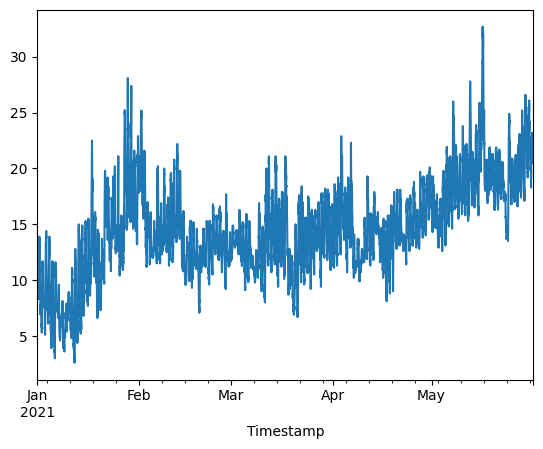

In [ ]:
temp = df['Castelló de la Plana - IES Vicent Sos Baynat']
temp.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((21739, 5, 1), (21739,))

In [ ]:
X_train1, y_train1 = X1[:6000], y1[:6000]
X_val1, y_val1 = X1[6000:6500], y1[6000:6500]
X_test1, y_test1 = X1[6500:15000], y1[6500:15000]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((6000, 5, 1), (6000,), (500, 5, 1), (500,), (8500, 5, 1), (8500,))

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
188/188 [==============================] - 8s 31ms/step - loss: 141.8483 - root_mean_squared_error: 11.9100 - val_loss: 130.9242 - val_root_mean_squared_error: 11.4422
Epoch 2/10
188/188 [==============================] - 5s 24ms/step - loss: 73.6696 - root_mean_squared_error: 8.5831 - val_loss: 53.8561 - val_root_mean_squared_error: 7.3387
Epoch 3/10
188/188 [==============================] - 5s 28ms/step - loss: 32.4543 - root_mean_squared_error: 5.6969 - val_loss: 21.0474 - val_root_mean_squared_error: 4.5877
Epoch 4/10
188/188 [==============================] - 5s 29ms/step - loss: 16.0567 - root_mean_squared_error: 4.0071 - val_loss: 9.6352 - val_root_mean_squared_error: 3.1041
Epoch 5/10
188/188 [==============================] - 5s 29ms/step - loss: 8.3001 - root_mean_squared_error: 2.8810 - val_loss: 4.3825 - val_root_mean_squared_error: 2.0934
Epoch 6/10
188/188 [==============================] - 5s 25ms/step - loss: 4.7379 - root_mean_squared_error: 2.1767 - val_lo

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
train_predictions = model2.predict(X_train1).flatten()
rmse = sqrt(mean_squared_error(y_train1, train_predictions))
train_results = pd.DataFrame(data={'Actuals':y_train1,'Train Predictions':train_predictions, 'RMSE': [rmse] * len(y_train1)})
train_results

188/188 [==============================] - 1s 3ms/step


,Actuals,Train Predictions,RMSE
0,10.3,10.404298,0.979261
1,9.8,10.316683,0.979261
2,9.8,10.092714,0.979261
3,10.0,9.927696,0.979261
4,10.0,9.877630,0.979261
...,...,...,...
5995,20.3,18.989483,0.979261
5996,20.8,19.015034,0.979261
5997,19.9,19.070164,0.979261
5998,19.9,19.041485,0.979261


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 2')

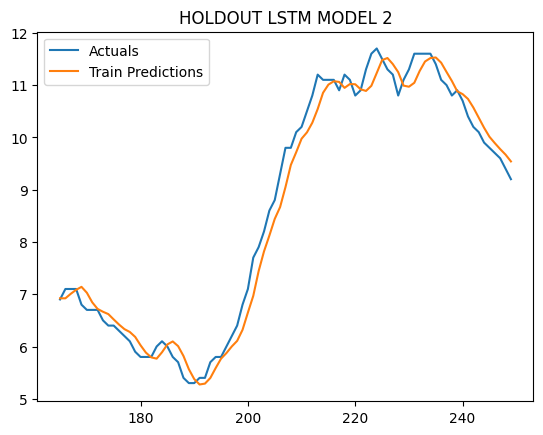

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Actuals'][165:250], label='Actuals')
plt.plot(train_results['Train Predictions'][165:250], label='Train Predictions')
plt.legend()
plt.title('HOLDOUT LSTM MODEL 2')

In [ ]:
val_predictions = model2.predict(X_val1).flatten()
rmse = sqrt(mean_squared_error(y_val1, val_predictions))
val_results = pd.DataFrame(data={ 'Actuals':y_val1, 'Val Predictions':val_predictions, 'RMSE': [rmse] * len(y_val1)})
val_results

16/16 [==============================] - 0s 3ms/step


,Actuals,Val Predictions,RMSE
0,18.6,18.935163,0.629594
1,17.6,18.701918,0.629594
2,16.8,18.265051,0.629594
3,16.1,17.636517,0.629594
4,15.9,16.909986,0.629594
...,...,...,...
495,9.7,9.658035,0.629594
496,9.7,9.668949,0.629594
497,9.8,9.674677,0.629594
498,9.8,9.732587,0.629594


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 2')

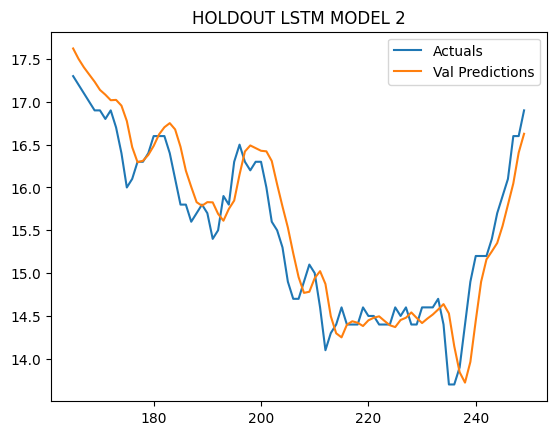

In [ ]:
plt.plot(val_results['Actuals'][165:250], label='Actuals')
plt.plot(val_results['Val Predictions'][165:250],label='Val Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 2')

In [ ]:
test_predictions = model2.predict(X_test1).flatten()
rmse = sqrt(mean_squared_error(y_test1, test_predictions))
test_results = pd.DataFrame(data={ 'Actuals':y_test1, 'Test Predictions':test_predictions, 'RMSE': [rmse] * len(y_test1)})

test_results

266/266 [==============================] - 1s 3ms/step


,Actuals,Test Predictions,RMSE
0,9.8,9.795156,0.396536
1,9.8,9.803201,0.396536
2,9.8,9.795381,0.396536
3,9.8,9.795381,0.396536
4,9.7,9.795381,0.396536
...,...,...,...
8495,13.3,13.214635,0.396536
8496,13.3,13.202717,0.396536
8497,13.3,13.189525,0.396536
8498,13.3,13.194132,0.396536


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 2')

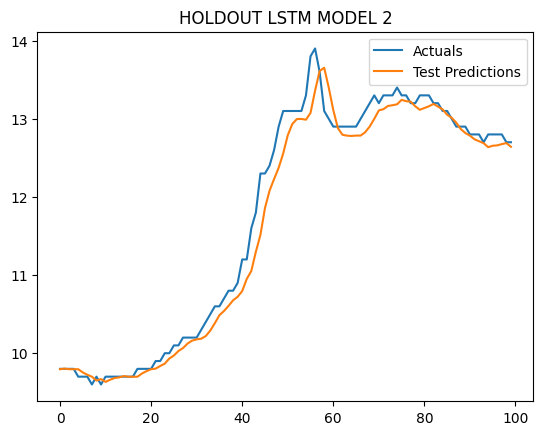

In [ ]:
plt.plot(test_results['Actuals'][:100], label='Actuals')
plt.plot(test_results['Test Predictions'][:100],label='Test Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Castellon Bayanat22.csv"

val_df = pd.read_csv(csv_path)
val_df

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
0,01/01/2021 00:00,9.7
1,01/01/2021 00:10,9.5
2,01/01/2021 00:20,9.3
3,01/01/2021 00:30,9.3
4,01/01/2021 00:40,9.1
...,...,...
21739,31/05/2021 23:10,21.3
21740,31/05/2021 23:20,21.2
21741,31/05/2021 23:30,21.2
21742,31/05/2021 23:40,21.3


In [ ]:
val_df.index = pd.to_datetime(val_df['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df[:10]

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,9.7
2021-01-01 00:10:00,01/01/2021 00:10,9.5
2021-01-01 00:20:00,01/01/2021 00:20,9.3
2021-01-01 00:30:00,01/01/2021 00:30,9.3
2021-01-01 00:40:00,01/01/2021 00:40,9.1
2021-01-01 00:50:00,01/01/2021 00:50,8.8
2021-01-01 01:00:00,01/01/2021 01:00,8.4
2021-01-01 01:10:00,01/01/2021 01:10,8.1
2021-01-01 01:20:00,01/01/2021 01:20,8.2


<Axes: xlabel='Timestamp'>

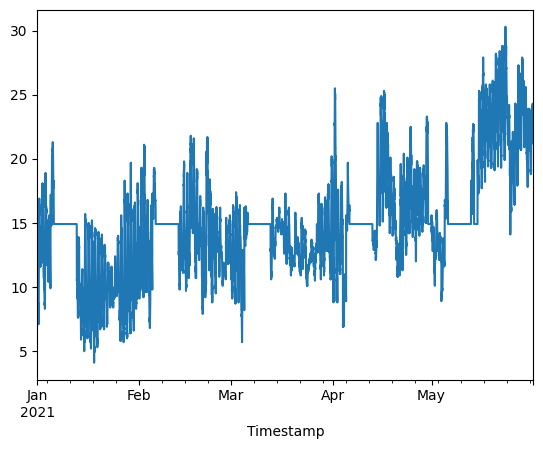

In [ ]:
val_df = val_df['Castelló de la Plana - IES Vicent Sos Baynat']
val_df.plot()

In [ ]:
WINDOW_SIZE = 5
X2, y2 = df_to_X_y(val_df, WINDOW_SIZE)
X2.shape, y2.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New, y_New = X2[:8754], y2[:8754]
X_New.shape, y_New.shape

((8754, 5, 1), (8754,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions1 = model2.predict(X_New).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New) | np.isnan(train_predictions1)

# Remove rows with NaN values
y_New_cleaned = y_New[~nan_mask]
train_predictions_cleaned = train_predictions1[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned).any() or np.isnan(train_predictions_cleaned).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse1 = sqrt(mean_squared_error(y_New_cleaned, train_predictions_cleaned))

# Create a DataFrame with the results
train_results1 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned, 'Actuals': y_New_cleaned, 'RMSE': [rmse1] * len(y_New_cleaned)})

# Specify the path where you want to save the CSV file
#csv_file_path = 'Castellon Bayanat 2022 C2.csv'

# Save the DataFrame to a CSV file
#train_results1.to_csv(csv_file_path, index=False)

#print(f'DataFrame has been saved to {csv_file_path}')
# Print or further analyze the results
print(train_results1)

274/274 [==============================] - 1s 3ms/step
      Train Predictions  Actuals      RMSE
0              9.214464      8.8  0.449922
1              9.029566      8.4  0.449922
2              8.739926      8.1  0.449922
3              8.394766      8.2  0.449922
4              8.215497      8.3  0.449922
...                 ...      ...       ...
8749          13.564733     13.3  0.449922
8750          13.367447     13.3  0.449922
8751          13.257380     13.3  0.449922
8752          13.193627     13.3  0.449922
8753          13.185017     13.2  0.449922

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 2')

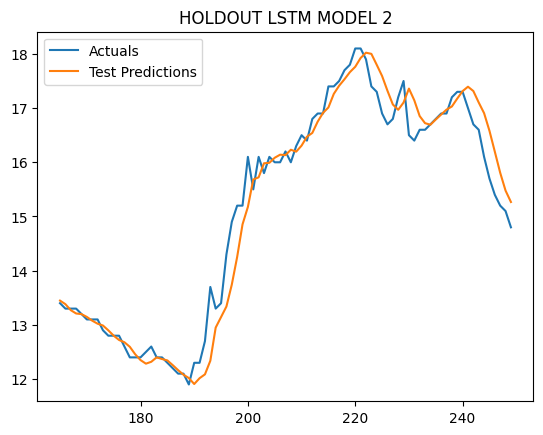

In [ ]:
plt.plot(train_results1['Actuals'][165:250], label='Actuals')
plt.plot(train_results1['Train Predictions'][165:250],label='Test Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Orpesa22.csv"

val_df2 = pd.read_csv(csv_path)
val_df2

,Timestamp,Orpesa Torre Bellver
0,01/01/2022 00:00,8.150000
1,01/01/2022 00:10,7.900000
2,01/01/2022 00:20,7.850000
3,01/01/2022 00:30,7.900000
4,01/01/2022 00:40,7.800000
...,...,...
21739,NaN,12.770466
21740,NaN,12.770466
21741,NaN,12.770466
21742,NaN,12.770466


In [ ]:
val_df2.index = pd.to_datetime(val_df2['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df2[:10]

,Timestamp,Orpesa Torre Bellver
Timestamp,,
2022-01-01 00:00:00,01/01/2022 00:00,8.15
2022-01-01 00:10:00,01/01/2022 00:10,7.90
2022-01-01 00:20:00,01/01/2022 00:20,7.85
2022-01-01 00:30:00,01/01/2022 00:30,7.90
2022-01-01 00:40:00,01/01/2022 00:40,7.80
2022-01-01 00:50:00,01/01/2022 00:50,8.00
2022-01-01 01:00:00,01/01/2022 01:00,8.35
2022-01-01 01:10:00,01/01/2022 01:10,8.50
2022-01-01 01:20:00,01/01/2022 01:20,8.85


<Axes: xlabel='Timestamp'>

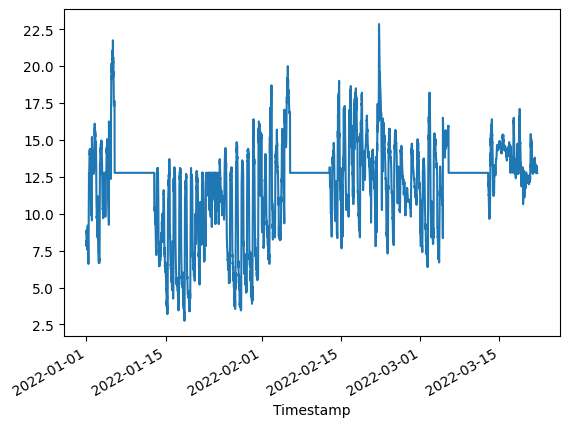

In [ ]:
val_df2 = val_df2['Orpesa Torre Bellver']
val_df2.plot()

In [ ]:
WINDOW_SIZE = 5
X3, y3 = df_to_X_y(val_df2, WINDOW_SIZE)
X2.shape, y2.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New2, y_New2 = X3[:8754], y3[:8754]
X_New2.shape, y_New2.shape

((8754, 5, 1), (8754,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions2 = model2.predict(X_New2).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New2) | np.isnan(train_predictions2)

# Remove rows with NaN values
y_New_cleaned2 = y_New2[~nan_mask]
train_predictions_cleaned2 = train_predictions2[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned2).any() or np.isnan(train_predictions_cleaned2).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse2 = sqrt(mean_squared_error(y_New_cleaned2, train_predictions_cleaned2))

# Create a DataFrame with the results
train_results2 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned2, 'Actuals': y_New_cleaned2, 'RMSE': [rmse2] * len(y_New_cleaned2)})

# Specify the path where you want to save the CSV file
#csv_file_path = 'Benicassim2022 C2.csv'

# Save the DataFrame to a CSV file
#train_results2.to_csv(csv_file_path, index=False)

#print(f'DataFrame has been saved to {csv_file_path}')
# Print or further analyze the results
print(train_results2)

274/274 [==============================] - 1s 4ms/step
      Train Predictions  Actuals      RMSE
0              7.842329     8.00  0.475968
1              7.931085     8.35  0.475968
2              8.135200     8.50  0.475968
3              8.362551     8.85  0.475968
4              8.684933     8.90  0.475968
...                 ...      ...       ...
8749          13.971753    13.60  0.475968
8750          13.701593    12.85  0.475968
8751          13.263922    12.20  0.475968
8752          12.708935    11.70  0.475968
8753          12.102954    11.10  0.475968

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 2')

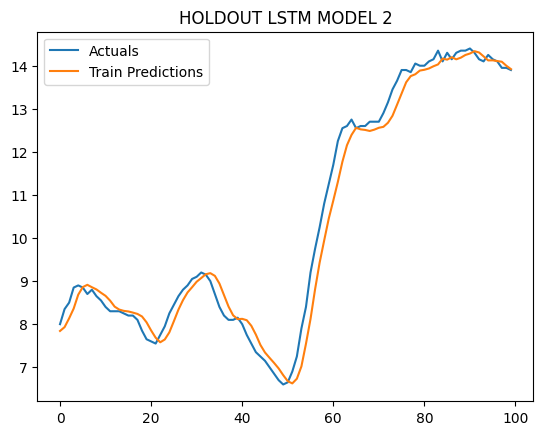

In [ ]:
plt.plot(train_results2['Actuals'][:100], label='Actuals')
plt.plot(train_results2['Train Predictions'][:100],label='Train Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/SantMateu22.csv"

val_df3 = pd.read_csv(csv_path)
val_df3

,Timestamp,Sant Mateu
0,01/01/2021 00:00,6.15
1,01/01/2021 00:10,6.70
2,01/01/2021 00:20,6.85
3,01/01/2021 00:30,6.65
4,01/01/2021 00:40,6.55
...,...,...
21739,31/05/2021 23:10,17.75
21740,31/05/2021 23:20,17.80
21741,31/05/2021 23:30,17.70
21742,31/05/2021 23:40,16.45


In [ ]:
val_df3.index = pd.to_datetime(val_df3['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df3[:10]

,Timestamp,Sant Mateu
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,6.15
2021-01-01 00:10:00,01/01/2021 00:10,6.70
2021-01-01 00:20:00,01/01/2021 00:20,6.85
2021-01-01 00:30:00,01/01/2021 00:30,6.65
2021-01-01 00:40:00,01/01/2021 00:40,6.55
2021-01-01 00:50:00,01/01/2021 00:50,6.20
2021-01-01 01:00:00,01/01/2021 01:00,6.35
2021-01-01 01:10:00,01/01/2021 01:10,6.15
2021-01-01 01:20:00,01/01/2021 01:20,6.10


<Axes: xlabel='Timestamp'>

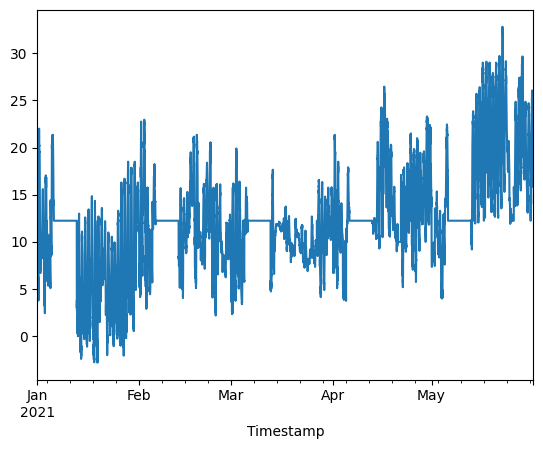

In [ ]:
val_df3 = val_df3['Sant Mateu']
val_df3.plot()

In [ ]:
WINDOW_SIZE = 5
X4, y4 = df_to_X_y(val_df3, WINDOW_SIZE)
X4.shape, y4.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New3, y_New3 = X4[:8754], y4[:8754]
X_New3.shape, y_New3.shape

((8754, 5, 1), (8754,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions3 = model2.predict(X_New3).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New3) | np.isnan(train_predictions3)

# Remove rows with NaN values
y_New_cleaned3 = y_New3[~nan_mask]
train_predictions_cleaned3 = train_predictions3[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned3).any() or np.isnan(train_predictions_cleaned3).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse3 = sqrt(mean_squared_error(y_New_cleaned3, train_predictions_cleaned3))

# Create a DataFrame with the results
train_results3 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned3, 'Actuals': y_New_cleaned3, 'RMSE': [rmse3] * len(y_New_cleaned3)})

# Specify the path where you want to save the CSV file
#csv_file_path = 'La vadalbla centre2022 C4.csv'

# Save the DataFrame to a CSV file
#train_results3.to_csv(csv_file_path, index=False)

#print(f'DataFrame has been saved to {csv_file_path}')
# Print or further analyze the results
print(train_results3)

274/274 [==============================] - 1s 3ms/step
      Train Predictions  Actuals      RMSE
0              6.780734     6.20  0.681455
1              6.451255     6.35  0.681455
2              6.310710     6.15  0.681455
3              6.201756     6.10  0.681455
4              6.139754     6.30  0.681455
...                 ...      ...       ...
8749          13.880118    11.90  0.681455
8750          12.732817    11.15  0.681455
8751          11.730807    10.80  0.681455
8752          11.104853    10.20  0.681455
8753          10.612526    10.05  0.681455

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 2')

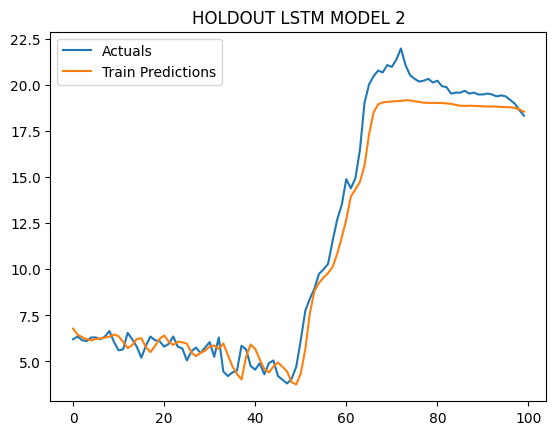

In [ ]:
plt.plot(train_results3['Actuals'][:100], label='Actuals')
plt.plot(train_results3['Train Predictions'][:100],label='Train Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Xodos22.csv"

val_df4 = pd.read_csv(csv_path)
val_df4

,Timestamp,Xodos
0,01/01/2021 00:00,16.4
1,01/01/2021 00:10,16.7
2,01/01/2021 00:20,17.1
3,01/01/2021 00:30,17.2
4,01/01/2021 00:40,17.2
...,...,...
21739,31/05/2021 23:10,17.7
21740,31/05/2021 23:20,17.7
21741,31/05/2021 23:30,18.0
21742,31/05/2021 23:40,17.9


In [ ]:
val_df4.index = pd.to_datetime(val_df4['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df4[:10]

,Timestamp,Xodos
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,16.4
2021-01-01 00:10:00,01/01/2021 00:10,16.7
2021-01-01 00:20:00,01/01/2021 00:20,17.1
2021-01-01 00:30:00,01/01/2021 00:30,17.2
2021-01-01 00:40:00,01/01/2021 00:40,17.2
2021-01-01 00:50:00,01/01/2021 00:50,17.1
2021-01-01 01:00:00,01/01/2021 01:00,16.9
2021-01-01 01:10:00,01/01/2021 01:10,17.2
2021-01-01 01:20:00,01/01/2021 01:20,17.4


<Axes: xlabel='Timestamp'>

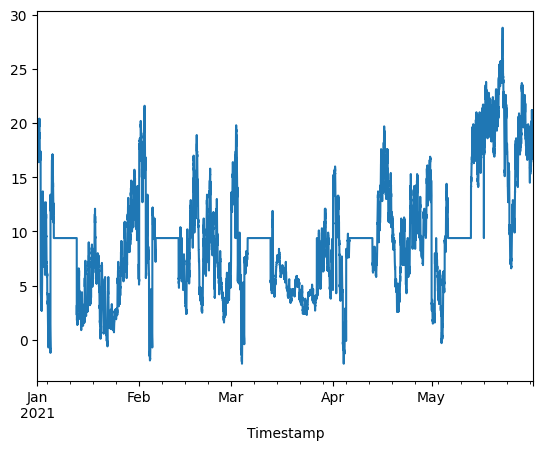

In [ ]:
val_df4 = val_df4['Xodos']
val_df4.plot()

In [ ]:
WINDOW_SIZE = 5
X5, y5 = df_to_X_y(val_df4, WINDOW_SIZE)
X5.shape, y5.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New4, y_New4 = X5[:8754], y5[:8754]
X_New4.shape, y_New4.shape

((8754, 5, 1), (8754,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions4 = model2.predict(X_New4).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New4) | np.isnan(train_predictions4)

# Remove rows with NaN values
y_New_cleaned4 = y_New4[~nan_mask]
train_predictions_cleaned4 = train_predictions4[~nan_mask]

train_predictions_cleaned4

274/274 [==============================] - 1s 3ms/step


array([17.304384, 17.302265, 17.191877, ..., 14.552459, 14.420473,
       14.441489], dtype=float32)

In [ ]:
# Check again for NaN values after removal
if np.isnan(y_New_cleaned4).any() or np.isnan(train_predictions_cleaned4).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse4 = sqrt(mean_squared_error(y_New_cleaned4, train_predictions_cleaned4))

# Create a DataFrame with the results
train_results4 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned4, 'Actuals': y_New_cleaned4, 'RMSE': [rmse4] * len(y_New_cleaned4)})

# Specify the path where you want to save the CSV file
#sv_file_path = 'La Torre den Besora -esportiva2022 C3.csv'

# Save the DataFrame to a CSV file
#train_results4.to_csv(csv_file_path, index=False)

#print(f'DataFrame has been saved to {csv_file_path}')
# Print or further analyze the results
print(train_results4)

      Train Predictions  Actuals      RMSE
0             17.304384     17.1  0.569973
1             17.302265     16.9  0.569973
2             17.191877     17.2  0.569973
3             17.228909     17.4  0.569973
4             17.358366     17.2  0.569973
...                 ...      ...       ...
8749          14.958095     14.7  0.569973
8750          14.821860     14.3  0.569973
8751          14.552459     14.4  0.569973
8752          14.420473     14.6  0.569973
8753          14.441489     14.4  0.569973

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 2')

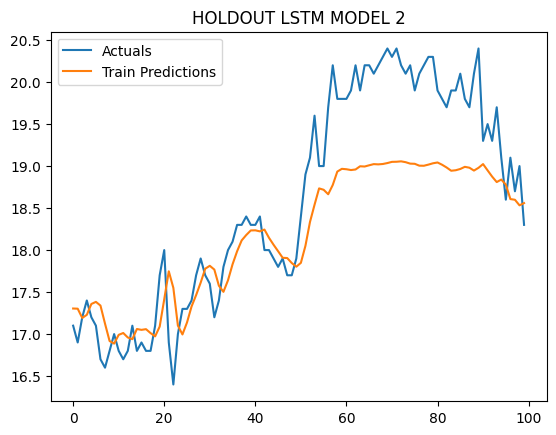

In [ ]:
plt.plot(train_results4['Actuals'][:100], label='Actuals')
plt.plot(train_results4['Train Predictions'][:100],label='Train Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Forcall22.csv"

val_df5 = pd.read_csv(csv_path)
val_df5

,Timestamp,Forcall
0,01/01/2021 00:00,2.8
1,01/01/2021 00:10,2.3
2,01/01/2021 00:20,2.2
3,01/01/2021 00:30,2.4
4,01/01/2021 00:40,2.5
...,...,...
21739,31/05/2021 23:10,17.6
21740,31/05/2021 23:20,17.3
21741,31/05/2021 23:30,17.1
21742,31/05/2021 23:40,16.9


In [ ]:
val_df5.index = pd.to_datetime(val_df5['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df5[:10]

,Timestamp,Forcall
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,2.8
2021-01-01 00:10:00,01/01/2021 00:10,2.3
2021-01-01 00:20:00,01/01/2021 00:20,2.2
2021-01-01 00:30:00,01/01/2021 00:30,2.4
2021-01-01 00:40:00,01/01/2021 00:40,2.5
2021-01-01 00:50:00,01/01/2021 00:50,2.3
2021-01-01 01:00:00,01/01/2021 01:00,1.9
2021-01-01 01:10:00,01/01/2021 01:10,1.8
2021-01-01 01:20:00,01/01/2021 01:20,1.7


<Axes: xlabel='Timestamp'>

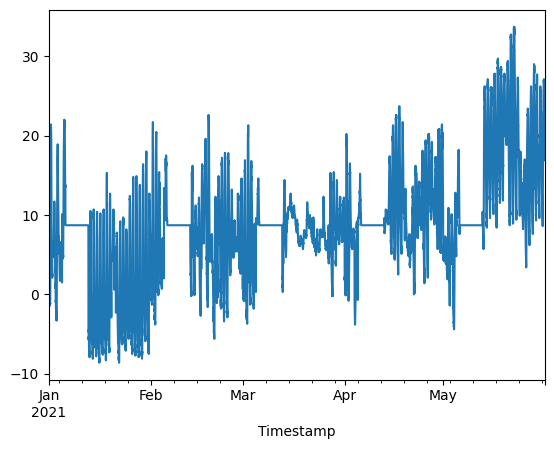

In [ ]:
val_df5 = val_df5['Forcall']
val_df5.plot()

In [ ]:
WINDOW_SIZE = 5
X6, y6 = df_to_X_y(val_df5, WINDOW_SIZE)
X6.shape, y6.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New5, y_New5 = X6[:8754], y6[:8754]
X_New5.shape, y_New5.shape

((8754, 5, 1), (8754,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions5 = model2.predict(X_New5).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New5) | np.isnan(train_predictions5)

# Remove rows with NaN values
y_New_cleaned5 = y_New5[~nan_mask]
train_predictions_cleaned5 = train_predictions5[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned5).any() or np.isnan(train_predictions_cleaned5).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse5 = sqrt(mean_squared_error(y_New_cleaned5, train_predictions_cleaned5))

# Create a DataFrame with the results
train_results5 = pd.DataFrame(data={'Train Predictions5': train_predictions_cleaned5, 'Actuals': y_New_cleaned5, 'RMSE': [rmse5] * len(y_New_cleaned5)})

# Specify the path where you want to save the CSV file
#csv_file_path = 'Olocau del Rei2022 C5.csv'

# Save the DataFrame to a CSV file
#train_results5.to_csv(csv_file_path, index=False)

#print(f'DataFrame has been saved to {csv_file_path}')
# Print or further analyze the results
print(train_results5)

274/274 [==============================] - 1s 3ms/step
      Train Predictions5  Actuals      RMSE
0               2.419988      2.3  2.389052
1               2.582719      1.9  2.389052
2               2.344988      1.8  2.389052
3               2.002554      1.7  2.389052
4               1.759258      2.0  2.389052
...                  ...      ...       ...
8749           13.847266     12.3  2.389052
8750           12.943213     11.8  2.389052
8751           12.249228     11.1  2.389052
8752           11.588362     10.3  2.389052
8753           10.905898      9.9  2.389052

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 2')

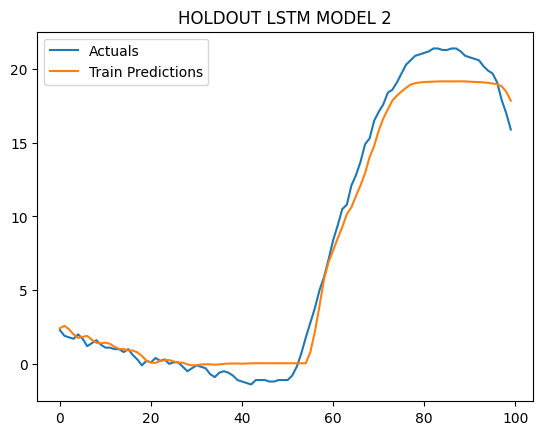

In [ ]:
plt.plot(train_results5['Actuals'][:100], label='Actuals')
plt.plot(train_results5['Train Predictions5'][:100],label='Train Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 2')